In [1]:
from data_cube_analysis import getdata, rms, masks, moments
from astropy import units as u 
from astropy.io import fits
import matplotlib.pyplot as plt
import spectral_cube
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
inputfile = '/Users/abarnes/Dropbox/work/Smallprojects/aces/data/alma/12m7mtp_bubble/hnco43.TP_7M_12M_weighted_mosaic.K.kms.galactic.fits'

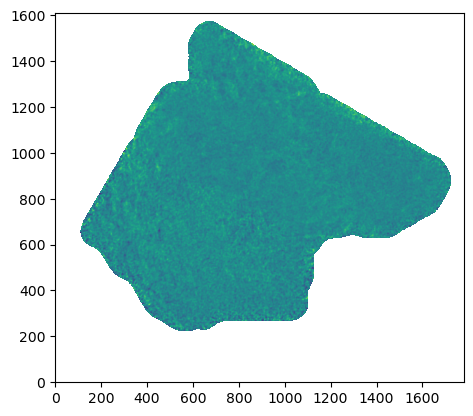

In [3]:
# Do contsub 
cube = getdata.get_cube(inputfile)
rms_map1 = rms.get_rmsrob(cube)
# rms_map2 = rms.get_rms(cube, [[-140, -90],[90, 140]])
rms_map1.data = np.float32(rms_map1.data)
# rms_map2.data = np.float32(rms_map2.data)
# rms_map1.data[np.isnan(rms_map1.data)] = rms_map2.data[np.isnan(rms_map1.data)]

mask = masks.get_expmask(cube, rms_map1, hthresh=5, lthresh=3, npix=10)
cube_masked = cube.with_mask(mask)

cube_revmasked = cube.with_mask(~mask)
cont = np.nanmean(cube_revmasked, axis=0)
cont[cont == 0] = np.nan
fits.PrimaryHDU(cont, rms_map1.header).writeto(inputfile.replace('.fits', '.cont.fits'), overwrite=True)
plt.imshow(cont, origin='lower')

hdu_contsub = cube.hdu 
hdu_contsub.data = hdu_contsub.data - cont
hdu_contsub.data = np.float32(hdu_contsub.data)
hdu_contsub.writeto(inputfile.replace('.fits', '.contsub.fits'), overwrite=True)

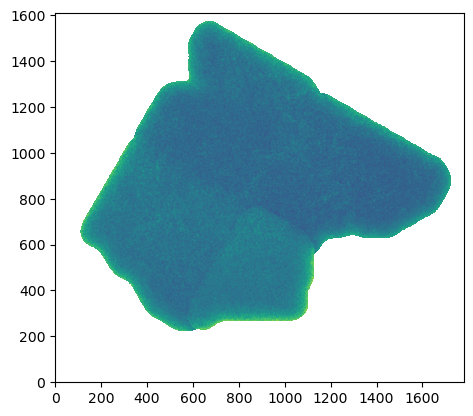

In [4]:
# Mask cube

cube = spectral_cube.SpectralCube.read(hdu_contsub)
rms_map1 = rms.get_rmsrob(cube)
rms_map2 = rms.get_rms(cube, [[-140, -90],[90, 140]])
rms_map1.data = np.float32(rms_map1.data)
rms_map2.data = np.float32(rms_map2.data)
rms_map1.data[np.isnan(rms_map1.data)] = rms_map2.data[np.isnan(rms_map1.data)]

rms_map1.writeto(inputfile.replace('.fits', '.rms.fits'), overwrite=True)
# rms_map2.writeto(inputfile.replace('.fits', '.rms2.fits'), overwrite=True)

plt.imshow(np.sqrt(rms_map1.data), origin='lower')

mask = masks.get_expmask(cube, rms_map1, hthresh=3, lthresh=1, npix=5)
cube_masked = cube.with_mask(mask)

hdu_masked = cube_masked.hdu
hdu_masked.data = np.float32(hdu_masked.data)
hdu_masked.writeto(inputfile.replace('.fits', '.masked.fits'), overwrite=True)

In [5]:
l = 0.8119
b = -0.1868
width = 240/3600
height = 240/3600

region_str = "galactic; circle(%s, %s, %s\")" %(l,b,width*3600)  
subcube_masked = cube_masked.subcube_from_ds9region(region_str)

hdu_masked = subcube_masked.hdu
hdu_masked.data = np.float32(hdu_masked.data)
hdu_masked.writeto(inputfile.replace('.fits', '.masked.region.fits'), overwrite=True)

KeyError: 'float16'